# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yanuar Putra Kharisma Adhiyasa
- **Email:** yanuarputra03@student.ub.ac.id
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Pada bulan apa penyewa sepeda mencapai puncak tertinggi total penyewa agar perusahaan bisa menambahkan fasilitas sepeda?
- Adakah alasan tertentu kenapa total penyewa mencapai puncaknya pada bulan tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
data_daily = pd.read_csv('day.csv')
data_hour = pd.read_csv('hour.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'day.csv'

In [ ]:
data_daily.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

Melihat masing-masing data apakah memiliki null value

In [ ]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data_daily.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melihat duplicate value masing-masing data

In [ ]:
print("Jumlah Duplikasi data pada data hour : ", data_hour.duplicated().sum())

Jumlah Duplikasi data pada data hour :  0


In [ ]:
print("Jumlah Duplikasi data pada data daily : ", data_daily.duplicated().sum())

Jumlah Duplikasi data pada data daily :  0


Melihat adakah duplikasi pada masing-masing data

### Cleaning Data

In [ ]:
data_daily[data_daily.weathersit.isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
data_hour[data_hour.weathersit.isna()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Menghitung jumlah weathersit value

In [ ]:
data_daily.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [ ]:
data_hour.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [ ]:
data_hour[data_hour.weathersit == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


Melihat masing-masing nilai weathersit maximum dan minimum masing-masing data

In [ ]:
data_daily[data_daily.weathersit == data_daily.weathersit.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787


In [ ]:
data_daily[data_daily.weathersit == data_daily.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


In [ ]:
data_hour[data_hour.weathersit == data_hour.weathersit.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362,17363,2012-12-31,1,1,12,7,0,1,1,1,0.16,0.1818,0.64,0.1343,2,83,85
17363,17364,2012-12-31,1,1,12,8,0,1,1,1,0.14,0.1515,0.69,0.1343,9,187,196
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Saya ingin merubah nilai-nilai pada season dengan deskripsi yang telah ada pada File README, berdasarkan value wheatersit yang telah dijelaskan saya bisa mengkategorikan musim-musimnya sebagai berikut :

1. springer
2. summer
3. fall
4. winter

In [ ]:
seasons = {
    1: "springer",
    2: "summer",
    3: "fall",
    4: "winter"
}

In [ ]:
data_daily["season"] = data_daily['season'].replace(seasons)

In [ ]:
data_hour["seaoson"] = data_hour["season"].replace(seasons)

In [ ]:
data_daily.season.value_counts()

fall        188
summer      184
springer    181
winter      178
Name: season, dtype: int64

In [ ]:
data_hour.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
data_daily.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean"],
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"]
})

instant      cnt                           casual             \
         nunique      sum   max   min         mean     sum   max  min   
season                                                                  
fall         188  1061129  8714  1115  5644.303191  226091  3160  118   
springer     181   471348  7836   431  2604.132597   60622  3155    9   
summer       184   918589  8362   795  4992.331522  203522  3410  120   
winter       178   841613  8555    22  4728.162921  129782  3031    2   

                      registered                          
                 mean        sum   max  min         mean  
season                                                    
fall      1202.611702     835038  6917  889  4441.691489  
springer   334.928177     410726  5315  416  2269.204420  
summer    1106.097826     715067  6456  674  3886.233696  
winter     729.112360     711831  6946   20  3999.050562

In [ ]:
data_hour.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean"],
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"]
})

instant      cnt                       casual                      \
       nunique      sum  max min        mean     sum  max min       mean   
season                                                                     
1         4242   471348  801   1  111.114569   60622  367   0  14.290901   
2         4409   918589  957   1  208.344069  203522  361   0  46.160581   
3         4496  1061129  977   1  236.016237  226091  350   0  50.287144   
4         4232   841613  967   1  198.868856  129782  362   0  30.666824   

       registered                       
              sum  max min        mean  
season                                  
1          410726  681   0   96.823668  
2          715067  782   0  162.183488  
3          835038  886   0  185.729093  
4          711831  876   0  168.202032

Mengubah kedua data pada data_daily dan data_hour pada kolom date menjadi format datetime.

In [ ]:
from datetime import datetime
data_daily['dteday'] = pd.to_datetime(data_daily['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

merge kedua data tersebut

In [ ]:
all_df = pd.merge(
    left = data_hour,
    right = data_daily,
    how = "left",
    left_on = "instant",
    right_on = "instant",
    suffixes = ["_hour", "_daily"]
)

Menampilkan hasil merge kedua data

In [ ]:
all_df.head(10)

,instant,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,4.0,1.0,1.0,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606.0
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,5.0,1.0,2.0,0.196522,0.208839,0.498696,0.168726,148.0,1362.0,1510.0
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,6.0,0.0,2.0,0.165000,0.162254,0.535833,0.266804,68.0,891.0,959.0
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,0.0,0.0,1.0,0.138333,0.116175,0.434167,0.361950,54.0,768.0,822.0
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,1.0,1.0,1.0,0.150833,0.150888,0.482917,0.223267,41.0,1280.0,1321.0


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday_hour       17379 non-null  datetime64[ns]
 2   season_hour       17379 non-null  int64         
 3   yr_hour           17379 non-null  int64         
 4   mnth_hour         17379 non-null  int64         
 5   hr                17379 non-null  int64         
 6   holiday_hour      17379 non-null  int64         
 7   weekday_hour      17379 non-null  int64         
 8   workingday_hour   17379 non-null  int64         
 9   weathersit_hour   17379 non-null  int64         
 10  temp_hour         17379 non-null  float64       
 11  atemp_hour        17379 non-null  float64       
 12  hum_hour          17379 non-null  float64       
 13  windspeed_hour    17379 non-null  float64       
 14  casual_hour       1737

## Visualization & Explanatory Analysis

Pertama kita akan menampilkan data_daily dan data_hour

di sini saya akan menampilkan jumlah rata-rata dan total pengguna berdasarkan jam pada rentang satu bulan.

dan menyajikan dalam bentuk visual

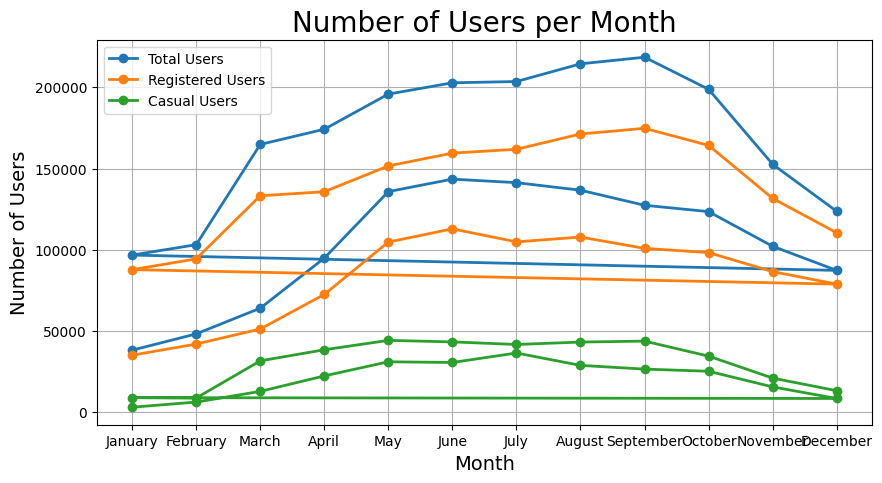

In [ ]:
import pandas as pd

daily_user_of_month_df = all_df.resample('M', on="dteday_daily").agg({
    "instant": "nunique",
    "cnt_daily": "sum",
    "registered_daily": "sum",
    "casual_daily": "sum"
})

# Reset index
daily_user_of_month_df = daily_user_of_month_df.reset_index()

# Konversi index ke DateTimeIndex
daily_user_of_month_df['dteday_daily'] = pd.to_datetime(daily_user_of_month_df['dteday_daily'])

# Set index pada kolom 'dteday_daily'
daily_user_of_month_df.set_index('dteday_daily', inplace=True)

# Konversi index ke formatted date strings
daily_user_of_month_df.index = daily_user_of_month_df.index.strftime('%B')

# Reset index to turn it into a column
daily_user_of_month_df.reset_index(inplace=True)

# Rename columns
daily_user_of_month_df.rename(columns={
    "instant": "user",
    "cnt_daily": "total user",
    "registered_daily": "registered user",
    "casual_daily": "casual user"
}, inplace=True)

daily_user_of_month_df.head()

plt.figure(figsize=(10, 5))
plt.plot(daily_user_of_month_df["dteday_daily"], daily_user_of_month_df["total user"], marker='o', linewidth=2, label="Total Users")
plt.plot(daily_user_of_month_df["dteday_daily"], daily_user_of_month_df["registered user"], marker='o', linewidth=2, label="Registered Users")
plt.plot(daily_user_of_month_df["dteday_daily"], daily_user_of_month_df["casual user"], marker='o', linewidth=2, label="Casual Users")
plt.title("Number of Users per Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

setelah berhasil melihat pattern, selanjutnya akan menampilkan jumlah pengguna berdasarkan musim.

<ipython-input-79-7a492486d052>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt_daily", y="season_daily", data=sum_user_of_season, palette=colors, ax=ax)
<ipython-input-79-7a492486d052>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="cnt_daily", y="season_daily", data=sum_user_of_season, palette=colors, ax=ax)


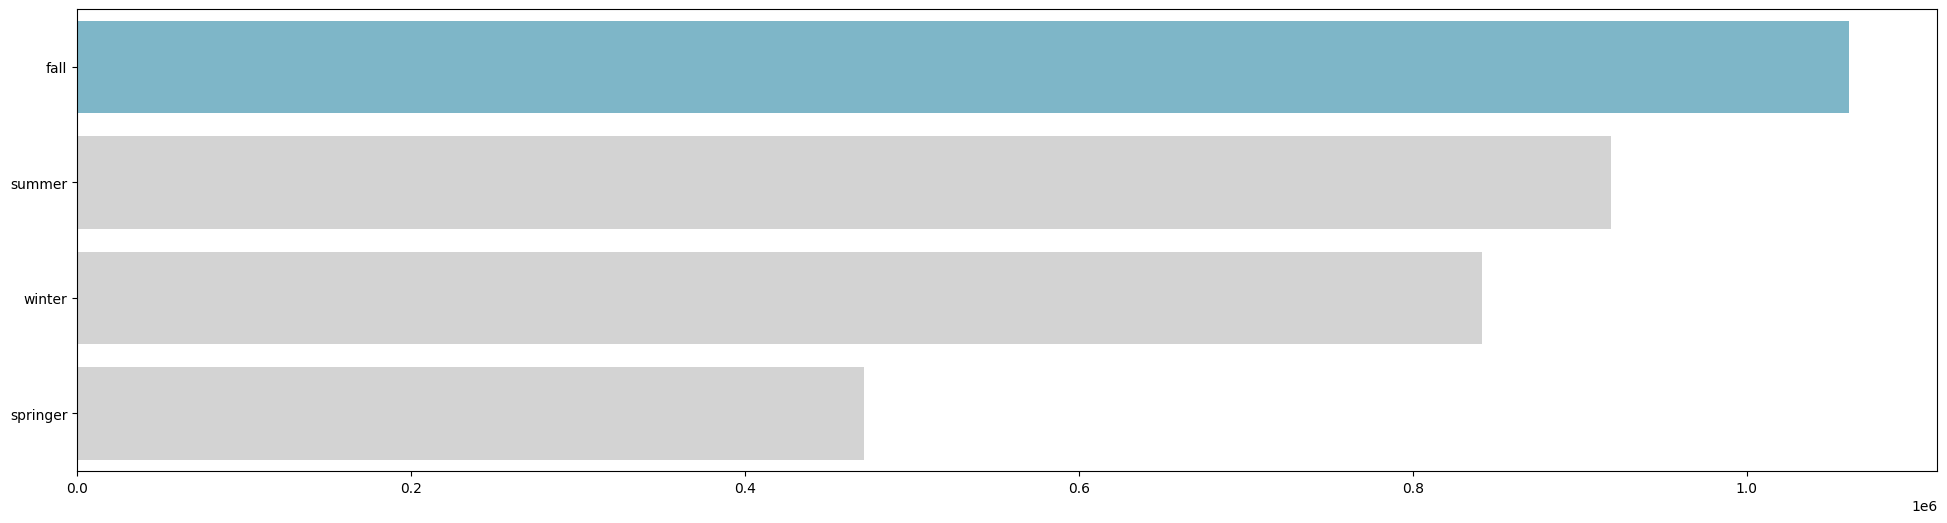

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="cnt_daily", y="season_daily", data=sum_user_of_season, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.show()

In [ ]:
all_df.to_csv('output.csv', index=True)

### Pertanyaan 1:

Bagaimana perilaku pengguna dalam rentang kurung waktu setahun?

### Pertanyaan 2:

Pada musim apakah pengguna sering melakukan aktivitas bersepeda? dan apa alasannya?

## Conclusion

- Menjawab untuk pertanyaan pertama, perilaku pengguna pada awal tahun memang sedikit dan pada puncaknya pada bula September
- Menjawab untuk pertanyaan kedua, pengguna melakukan aktivitas bersepeda pada musim gugur yang dirasa tidak terlalu panas maupun dingin, dan nuansa lembab setelah terjadinya musim panas sebelum memasuki musim dingin.